NameError: name 'x1plot' is not defined

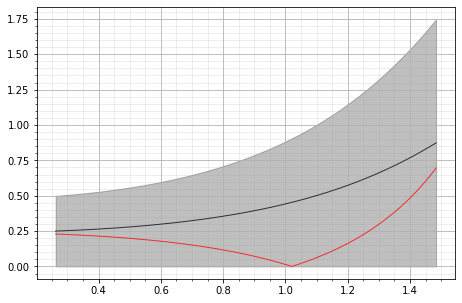

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
from scipy.optimize import curve_fit

input = 'V23.txt'

xo = np.loadtxt(input, float, usecols=0, skiprows=5, delimiter=',')
y0o = np.loadtxt(input, float, usecols=1, skiprows=5, delimiter=',')
y90o = np.loadtxt(input, float, usecols=2, skiprows=5, delimiter=',')
phi = np.loadtxt(input, float, usecols=3, skiprows=5, delimiter=',')

x = (90 - ( xo / 2 ))/180*np.pi
y0 = (y0o + 0.02)/2.305
y90 = (y90o + 0.02)/1.029
xerr = 1.3
y0err = 0
y90err = 0

def beta(x):
    return np.arcsin(np.sin(x)/1.63)

def f1(x):
    return np.sin(x-beta(x))/np.sin(x+beta(x))

def f1err(x):
    return np.sin(x - np.arcsin(0.613496932515337*np.sin(x)))/np.sin(x + np.arcsin(0.613496932515337*np.sin(x)))

def f2(x):
    return abs(np.tan(x-beta(x))/np.tan(x+beta(x)))

def f2err(x):
    return 1

fig, ax = plt.subplots(figsize=(7.5,5))
xplot_1 = np.linspace(min(x), max(x), 10000)

ax.set_xlabel(r'')
ax.set_ylabel(r'')
ax.grid()
ax.grid(which='minor', color='#999999', alpha=0.2, linestyle='-')
ax.minorticks_on()
ax.plot(xplot_1, f1(xplot_1), color = 'black', alpha = 0.75, linewidth = 1, label = '')
plt.fill_between(xplot_1, f1(xplot_1)-f1err(xplot_1), f1(xplot_1)+f1err(xplot_1), color = 'black', alpha = 0.25)
ax.plot(xplot_1, f2(xplot_1), color = 'red', alpha = 0.75, linewidth = 1, label = '')
plt.fill_between(x1plot, f2(x1plot)-f2err(x1plot), f2(x1plot)+f2err(x1plot), color = [200/255,60/255,40/255], alpha = 0.25)
ax.errorbar(x, y0, xerr = xerr, yerr = 0, fmt = '.', color = 'black', alpha = 0.75, linewidth=1, ecolor="black", capsize=3, label = r'$\alpha_\mathrm{P1}=0\,\degree$')
ax.errorbar(x, y90, xerr = xerr, yerr = 0, fmt = '.', color = 'red', alpha = 0.75, linewidth=1, ecolor="black", capsize=3, label = r'$\alpha_\mathrm{P1}=90\,\degree$')
ax.legend()
plt.savefig('', facecolor = 'white', bbox_inches='tight')
plt.show()